## Import Packages

In [2]:
import numpy as np 
import pandas as pd 

## Read Data 

In [3]:
data=pd.read_csv('water_dataX.csv',encoding="ISO-8859-1")
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


## Check Data Types 

In [4]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

## Conversion of Data Types

In [5]:
#conversions
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(data['FECAL COLIFORM (MPN/100ml)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

## Drop unrequired columns and check for null values

In [6]:
data.drop(data.columns[[0,1,2,11]],axis=1,inplace=True)
data.isnull().sum()

Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          316
TOTAL COLIFORM (MPN/100ml)Mean      132
dtype: int64

In [7]:
data.head()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,30.6,6.7,7.5,203.0,NaN,0.1,11.0,27.0
1,29.8,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0
2,29.5,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0
3,29.7,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0
4,29.5,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0


## Fill the missing data

In [8]:
for i in data.columns:
    data[i]=data[i].fillna(value=data[i].mean())

In [9]:
data.isnull().sum()

Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
dtype: int64

## Initializations of Values(Cloning)

In [10]:
#initialization
start=2
end=1991
do= data.iloc [start:end ,1].astype(np.float64)
value=0
ph = data.iloc[ start:end,2]  
co = data.iloc [start:end ,3].astype(np.float64)
tc=data.iloc [2:end ,7].astype(np.float64)
bod = data.iloc [start:end ,4].astype(np.float64)
na= data.iloc [start:end ,5].astype(np.float64)
na.dtype

dtype('float64')

In [11]:
data.head()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,30.6,6.7,7.5,203.0,6.940049,0.1,11.0,27.0
1,29.8,5.7,7.2,189.0,2.000000,0.2,4953.0,8391.0
2,29.5,6.3,6.9,179.0,1.700000,0.1,3243.0,5330.0
3,29.7,5.8,6.9,64.0,3.800000,0.5,5382.0,8443.0
4,29.5,5.8,7.3,83.0,1.900000,0.4,3428.0,5500.0


In [12]:
data=pd.concat([do,ph,co,bod,na,tc],axis=1)
data. columns = ['do','ph','co','bod','na','tc']

In [13]:
data.head()

,do,ph,co,bod,na,tc
2,6.3,6.9,179.0,1.7,0.1,5330.0
3,5.8,6.9,64.0,3.8,0.5,8443.0
4,5.8,7.3,83.0,1.9,0.4,5500.0
5,5.5,7.4,81.0,1.5,0.1,4049.0
6,6.1,6.7,308.0,1.4,0.3,5672.0


In [14]:
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [15]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [16]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [17]:
#calc of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [18]:
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))


In [19]:
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

data.head()
data.dtypes

do      float64
ph      float64
co      float64
bod     float64
na      float64
tc      float64
npH       int64
ndo       int64
nco       int64
nbdo      int64
nec       int64
nna       int64
dtype: object

In [20]:
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco
data.head()

,do,ph,co,bod,na,tc,npH,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
2,6.3,6.9,179.0,1.7,0.1,5330.0,80,100,40,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,5.8,6.9,64.0,3.8,0.5,8443.0,80,80,40,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,5.8,7.3,83.0,1.9,0.4,5500.0,100,80,40,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,5.5,7.4,81.0,1.5,0.1,4049.0,100,80,40,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,6.1,6.7,308.0,1.4,0.3,5672.0,60,100,40,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44


In [21]:
#calculation overall wqi for each year
#ag=data.groupby('year')['wqi'].mean()

In [22]:
data.isnull().sum()

do      0
ph      0
co      0
bod     0
na      0
tc      0
npH     0
ndo     0
nco     0
nbdo    0
nec     0
nna     0
wph     0
wdo     0
wbdo    0
wec     0
wna     0
wco     0
wqi     0
dtype: int64

In [23]:
import seaborn as sns

<AxesSubplot:>

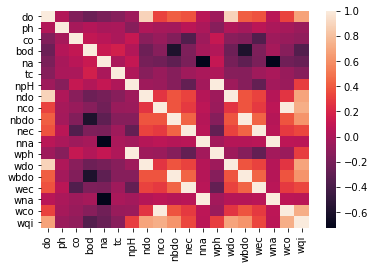

In [24]:
sns.heatmap(data.corr())

C:\Users\Rishika Sharon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wqi', ylabel='Density'>

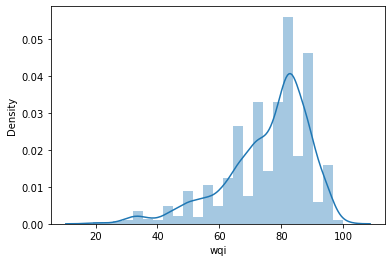

In [25]:
sns.distplot(data['wqi'],bins=25,kde=True)

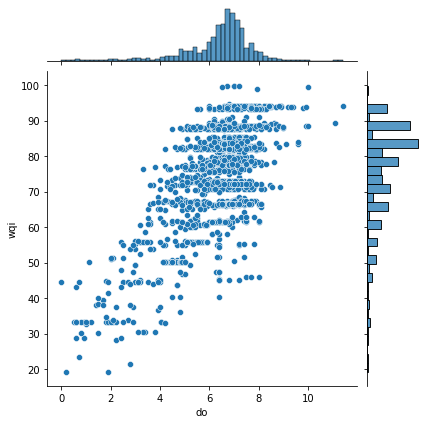

In [26]:
sns.jointplot(x='do',y='wqi',data=data,kind='scatter')

<AxesSubplot:>

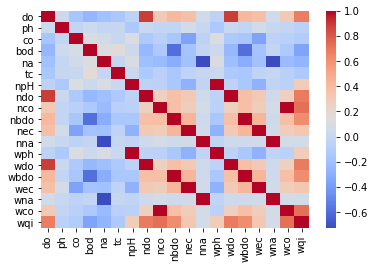

In [27]:
sns.heatmap(data.corr(),cmap='coolwarm')

Text(0, 0.5, 'Frequency')

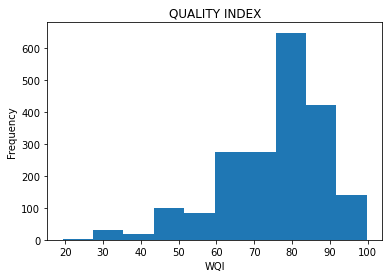

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# plot histogram
ax.hist(data['wqi'])
# set title and labels
ax.set_title('QUALITY INDEX')
ax.set_xlabel('WQI')
ax.set_ylabel('Frequency')

{'whiskers': [<matplotlib.lines.Line2D at 0x13b8c7df6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x13b8c7dfd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b8c7df370>],
 'medians': [<matplotlib.lines.Line2D at 0x13b8c7ec490>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b8c7ec7f0>],
 'means': []}

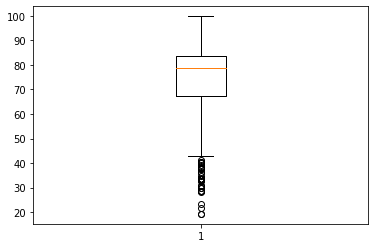

In [30]:
plt.boxplot(data['wqi'])

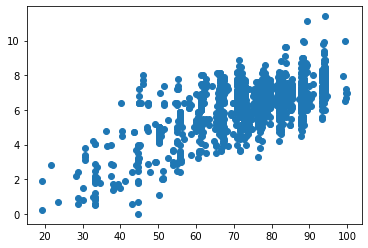

In [31]:
plt.scatter(data['wqi'],data['do']) 
plt.show() 

In [32]:
import matplotlib.pyplot as plt

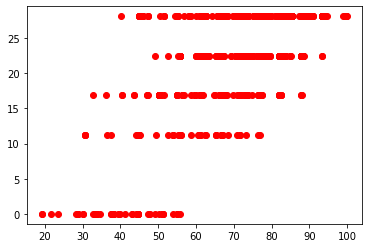

In [33]:
plt.scatter(data['wqi'],data['wdo'],color='red')

In [34]:
data.corr()

,do,ph,co,bod,na,tc,npH,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
do,1.000000,0.034819,-0.165748,-0.248498,-0.190878,-0.142970,-0.049592,0.890867,0.323838,0.417970,0.372918,0.055922,-0.049592,0.890867,0.417970,0.372918,0.055922,0.323838,0.678835
ph,0.034819,1.000000,-0.017860,0.041400,-0.006630,-0.002126,-0.133475,0.017904,-0.017073,-0.019346,0.067391,0.002730,-0.133475,0.017904,-0.019346,0.067391,0.002730,-0.017073,-0.059446
co,-0.165748,-0.017860,1.000000,0.101524,0.056563,0.003404,0.113991,-0.132189,-0.067123,-0.159589,-0.361571,-0.051449,0.113991,-0.132189,-0.159589,-0.361571,-0.051449,-0.067123,-0.104824
bod,-0.248498,0.041400,0.101524,1.000000,0.126051,0.164391,0.029930,-0.247562,-0.135078,-0.587243,-0.178129,-0.015633,0.029930,-0.247562,-0.587243,-0.178129,-0.015633,-0.135078,-0.349364
na,-0.190878,-0.006630,0.056563,0.126051,1.000000,-0.000897,0.108448,-0.206099,-0.230503,-0.303879,-0.193567,-0.726827,0.108448,-0.206099,-0.303879,-0.193567,-0.726827,-0.230503,-0.264952
tc,-0.142970,-0.002126,0.003404,0.164391,-0.000897,1.000000,0.020617,-0.137880,-0.071770,-0.142592,-0.044908,0.000602,0.020617,-0.137880,-0.142592,-0.044908,0.000602,-0.071770,-0.133946
npH,-0.049592,-0.133475,0.113991,0.029930,0.108448,0.020617,1.000000,-0.049214,-0.062054,-0.145703,-0.288119,-0.027950,1.000000,-0.049214,-0.145703,-0.288119,-0.027950,-0.062054,0.304437
ndo,0.890867,0.017904,-0.132189,-0.247562,-0.206099,-0.137880,-0.049214,1.000000,0.270071,0.382092,0.323205,0.048204,-0.049214,1.000000,0.382092,0.323205,0.048204,0.270071,0.687949
nco,0.323838,-0.017073,-0.067123,-0.135078,-0.230503,-0.071770,-0.062054,0.270071,1.000000,0.380876,0.288463,0.073066,-0.062054,0.270071,0.380876,0.288463,0.073066,1.000000,0.728725
nbdo,0.417970,-0.019346,-0.159589,-0.587243,-0.303879,-0.142592,-0.145703,0.382092,0.380876,1.000000,0.436725,0.044731,-0.145703,0.382092,1.000000,0.436725,0.044731,0.380876,0.619243


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x=data.iloc[:,[0,1,2,3,4,5]]
y=data.iloc[:,[18]]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
x_train.head()

,do,ph,co,bod,na,tc
161,6.6,6.4,101.0,2.5,0.200000,41.0
1595,7.1,6.1,34.0,0.6,0.500000,1975.0
320,6.9,7.5,159.0,2.8,1.000000,82.0
994,4.9,7.0,180.0,1.2,1.623079,10.0
467,7.9,7.3,46.0,1.4,1.000000,29.0


In [39]:
y_train.head()

,wqi
161,77.50
1595,66.44
320,88.20
994,82.58
467,94.18


In [40]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()

In [41]:
mr.fit(x_train,y_train)

LinearRegression()

In [42]:
y_predict=mr.predict(x_test)
y_predict

array([[54.48165484],
       [79.10809413],
       [51.48411042],
       [79.64329086],
       [80.42828766],
       [74.0342572 ],
       [79.01901118],
       [87.72890681],
       [83.53664578],
       [75.44883091],
       [80.73509534],
       [66.65842756],
       [53.979045  ],
       [76.64903948],
       [64.24533252],
       [68.86744137],
       [76.92382891],
       [58.39581154],
       [88.84251416],
       [82.70255812],
       [77.77876259],
       [78.52283707],
       [77.22037473],
       [77.19118296],
       [82.29234395],
       [81.37746987],
       [81.06664363],
       [83.08394892],
       [50.00440148],
       [74.77280319],
       [76.16480116],
       [67.97983374],
       [70.27385717],
       [83.53907108],
       [65.35413662],
       [92.10981807],
       [76.26430148],
       [76.01053336],
       [71.62537758],
       [76.02621616],
       [77.53163221],
       [66.53789817],
       [81.33673836],
       [69.70132826],
       [77.29335683],
       [64

In [43]:
y_test

,wqi
1294,37.44
1312,78.48
962,44.58
109,79.64
1558,93.28
...,...
362,76.34
1803,67.06
1390,93.28
1028,77.90


In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y_test,y_predict)

0.5589655922436569

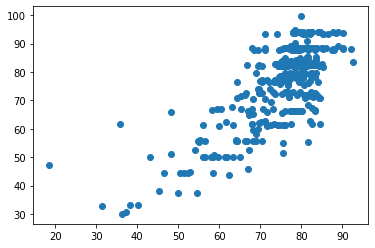

In [46]:
plt.scatter(y_predict,y_test)

In [47]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_predict,y_test))

mse:81.31


In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf=RandomForestRegressor(n_estimators=10,random_state=0,n_jobs=-1)
rf.fit(x_train,y_train)

<ipython-input-49-3c267a1a3460>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=0)

In [50]:
import pickle
pickle.dump(rf,open('random.pkl','wb'))

In [51]:
y_pred=rf.predict(x_test)
y_pred

array([43.48 , 76.58 , 43.228, 79.64 , 92.718, 90.258, 66.44 , 88.38 ,
       82.4  , 59.166, 79.46 , 55.82 , 53.75 , 73.022, 75.924, 55.82 ,
       71.178, 44.178, 88.614, 71.34 , 87.66 , 88.38 , 88.2  , 75.524,
       79.64 , 91.174, 85.188, 82.58 , 46.148, 82.04 , 77.9  , 63.824,
       76.42 , 82.842, 63.59 , 88.02 , 83.7  , 85.098, 65.248, 77.986,
       88.834, 67.906, 82.04 , 67.062, 87.768, 55.82 , 66.114, 55.82 ,
       90.376, 70.076, 82.94 , 76.142, 82.94 , 83.7  , 94.18 , 50.26 ,
       83.7  , 82.76 , 77.554, 61.44 , 93.28 , 82.364, 77.158, 94.18 ,
       91.176, 83.7  , 64.992, 66.44 , 56.756, 86.796, 82.58 , 82.4  ,
       85.26 , 78.08 , 77.864, 78.012, 50.308, 72.38 , 69.762, 66.35 ,
       76.214, 77.302, 85.26 , 82.418, 43.564, 70.768, 66.44 , 94.   ,
       82.94 , 75.548, 88.708, 93.82 , 77.436, 76.034, 72.68 , 83.7  ,
       73.278, 82.04 , 60.532, 88.38 , 82.4  , 88.2  , 87.66 , 58.576,
       50.2  , 80.814, 81.924, 87.66 , 88.02 , 78.966, 53.4  , 82.98 ,
      

In [52]:
y_test

,wqi
1294,37.44
1312,78.48
962,44.58
109,79.64
1558,93.28
...,...
362,76.34
1803,67.06
1390,93.28
1028,77.90


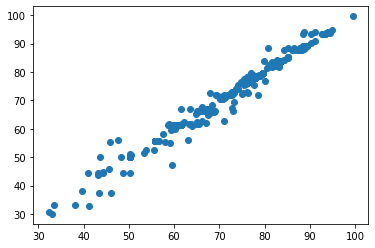

In [53]:
plt.scatter(y_pred,y_test)

# Accuracy

In [54]:
r2_score(y_test,y_pred)

0.9803465011279101

In [55]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_pred,y_test))

mse:3.62


In [56]:
rf.predict([[6.3,6.9,179,1.7,0.1,5330.0]])

array([79.334])

In [59]:
pip install -U scikit-learn==0.21.3

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Rishika' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import numpy as np
from flask import Flask, request, render_template
import pickle
model = pickle.load(open('random.pkl','rb'))


app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():

    float_features = []
    float_features.append(float(request.form['do']))
    float_features.append(float(request.form['ph']))
    float_features.append(float(request.form['co']))
    float_features.append(float(request.form['bod']))
    float_features.append(float(request.form['na']))
    float_features.append(float(request.form['tc']))
    final_features = [np.array(float_features)]
    prediction = model.predict(final_features)

    output = np.round_(prediction[[0]], 2)

    return render_template('index.html', wqi=output[0])

if __name__ == "__main__":
    app.run(debug=False)